# Bike Sharing prediction based on Poisson regression model 

# Importing Libraries 

In [ ]:
import numpy as np # mathematical computation
import pandas as pd # data processing
import matplotlib.pyplot as plt # visualization
from matplotlib import pyplot
import seaborn as sns # visualization
import warnings 
warnings.filterwarnings('ignore') #ignore warnings


from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

#Preprocessing related Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


#Date related Libraries
from datetime import date
#import holidays
import datetime


# Loading dataset 

In [26]:
dfhour = pd.read_csv(r"E:\DS workspace\ML DL Python\aca tor dataset\bike sharing\hour.csv")
dfhour = dfhour.drop(columns={"instant","yr","mnth"})
dfhour = dfhour.rename(columns={'dteday':'date','weathersit':'weather','hum':'humidity','cnt':'count'})
dfhour['date']=pd.to_datetime(dfhour.date)
dfhour.head()

date  season  hr  holiday  weekday  workingday  weather  temp   atemp  \
0 2011-01-01       1   0        0        6           0        1  0.24  0.2879   
1 2011-01-01       1   1        0        6           0        1  0.22  0.2727   
2 2011-01-01       1   2        0        6           0        1  0.22  0.2727   
3 2011-01-01       1   3        0        6           0        1  0.24  0.2879   
4 2011-01-01       1   4        0        6           0        1  0.24  0.2879   

   humidity  windspeed  casual  registered  count  
0      0.81        0.0       3          13     16  
1      0.80        0.0       8          32     40  
2      0.80        0.0       5          27     32  
3      0.75        0.0       3          10     13  
4      0.75        0.0       0           1      1

* Dataset has the information of sales for each hour from 01-01-2011 to 31-12-2012

In [27]:
tcast = ( 'holiday', 'workingday', 'weather','season','hr','weekday')
for i in tcast:
    dfhour[i]=dfhour[i].astype('category')
df1 = dfhour.copy()
df = dfhour.copy()

In [28]:
dfhour

date season  hr holiday weekday workingday weather  temp   atemp  \
0     2011-01-01      1   0       0       6          0       1  0.24  0.2879   
1     2011-01-01      1   1       0       6          0       1  0.22  0.2727   
2     2011-01-01      1   2       0       6          0       1  0.22  0.2727   
3     2011-01-01      1   3       0       6          0       1  0.24  0.2879   
4     2011-01-01      1   4       0       6          0       1  0.24  0.2879   
...          ...    ...  ..     ...     ...        ...     ...   ...     ...   
17374 2012-12-31      1  19       0       1          1       2  0.26  0.2576   
17375 2012-12-31      1  20       0       1          1       2  0.26  0.2576   
17376 2012-12-31      1  21       0       1          1       1  0.26  0.2576   
17377 2012-12-31      1  22       0       1          1       1  0.26  0.2727   
17378 2012-12-31      1  23       0       1          1       1  0.26  0.2727   

       humidity  windspeed  casual  registered  count  
0          0.81     0.0000       3          13     16  
1          0.80     0.0000       8          32     40  
2          0.80     0.0000       5          27     32  
3          0.75     0.0000       3          10     13  
4          0.75     0.0000       0           1      1  
...         ...        ...     ...         ...    ...  
17374      0.60     0.1642      11         108    119  
17375      0.60     0.1642       8          81     89  
17376      0.60     0.1642       7          83     90  
17377      0.56     0.1343      13          48     61  
17378      0.65     0.1343      12          37     49  

[17379 rows x 14 columns]

In [29]:
df['date'] = pd.to_datetime(df.date)

In [30]:
#df['DAY_OF_WEEK'] = df.date.dt.dayofweek
df['date'] = pd.to_datetime(df.date)
df['Year']=df['date'].dt.year
df['Month']=df['date'].dt.month
df['Day']=df['date'].dt.day
df['Week']=df['date'].dt.week
df.head()

date season hr holiday weekday workingday weather  temp   atemp  \
0 2011-01-01      1  0       0       6          0       1  0.24  0.2879   
1 2011-01-01      1  1       0       6          0       1  0.22  0.2727   
2 2011-01-01      1  2       0       6          0       1  0.22  0.2727   
3 2011-01-01      1  3       0       6          0       1  0.24  0.2879   
4 2011-01-01      1  4       0       6          0       1  0.24  0.2879   

   humidity  windspeed  casual  registered  count  Year  Month  Day  Week  
0      0.81        0.0       3          13     16  2011      1    1    52  
1      0.80        0.0       8          32     40  2011      1    1    52  
2      0.80        0.0       5          27     32  2011      1    1    52  
3      0.75        0.0       3          10     13  2011      1    1    52  
4      0.75        0.0       0           1      1  2011      1    1    52

In [31]:
df.columns

Index(['date', 'season', 'hr', 'holiday', 'weekday', 'workingday', 'weather',
       'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'count', 'Year', 'Month', 'Day', 'Week'],
      dtype='object')

# Data Cleaning

## Handling missing values

In [20]:
#checking for null values in training dataset
df.isnull().sum()

date          0
season        0
hr            0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
MONTH         0
DAY           0
dtype: int64

- There is no Missing values in the dataset

# Descriptive analysis

In [21]:
df.describe()

temp         atemp      humidity     windspeed        casual  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.496987      0.475775      0.627229      0.190098     35.676218   
std        0.192556      0.171850      0.192930      0.122340     49.305030   
min        0.020000      0.000000      0.000000      0.000000      0.000000   
25%        0.340000      0.333300      0.480000      0.104500      4.000000   
50%        0.500000      0.484800      0.630000      0.194000     17.000000   
75%        0.660000      0.621200      0.780000      0.253700     48.000000   
max        1.000000      1.000000      1.000000      0.850700    367.000000   

         registered         count         MONTH           DAY  
count  17379.000000  17379.000000  17379.000000  17379.000000  
mean     153.786869    189.463088      6.537775     15.683411  
std      151.357286    181.387599      3.438776      8.789373  
min        0.000000      1.000000      1.000000      1.000000  
25%       34.000000     40.000000      4.000000      8.000000  
50%      115.000000    142.000000      7.000000     16.000000  
75%      220.000000    281.000000     10.000000     23.000000  
max      886.000000    977.000000     12.000000     31.000000

# Exploratory Data Analysis

## Exploring train data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [196]:
df[df['holiday']==1]['count'].describe().T

count    500.000000
mean     156.870000
std      156.757478
min        1.000000
25%       28.750000
50%       97.000000
75%      253.250000
max      712.000000
Name: count, dtype: float64

# Analysis on bike counts based on Holiday

In [194]:
#Impact of holidays on sales
print("holiday")
print(df[df['holiday']==1]['count'].describe().T)
print("Not holiday")
print(df[df['holiday']==0]['count'].describe().T)

holiday
count    500.000000
mean     156.870000
std      156.757478
min        1.000000
25%       28.750000
50%       97.000000
75%      253.250000
max      712.000000
Name: count, dtype: float64
Not holiday
count    16879.000000
mean       190.428580
std        181.981435
min          1.000000
25%         40.000000
50%        144.000000
75%        281.500000
max        977.000000
Name: count, dtype: float64


* No. of people bike share is more is week days

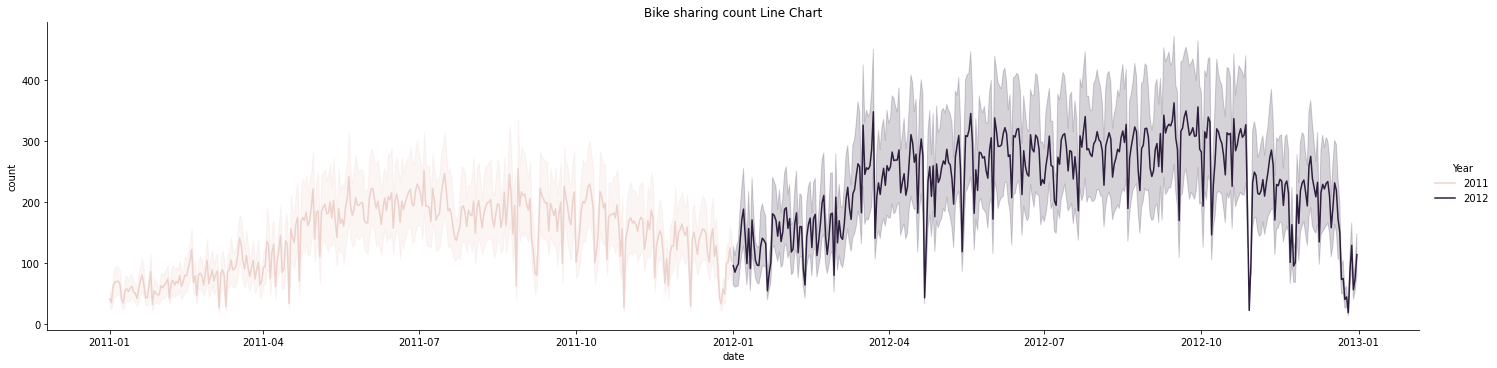

In [33]:
sns.relplot(x='date',y='count',hue='Year',data=df, kind='line',aspect=4)
plt.title("Bike sharing count Line Chart")
plt.show()

- It can be seen through Line chart that there is no trend in year wise and no random event also happens in any year.
- in a year the middle part the year has higher count ( may be due to the season and temperture)

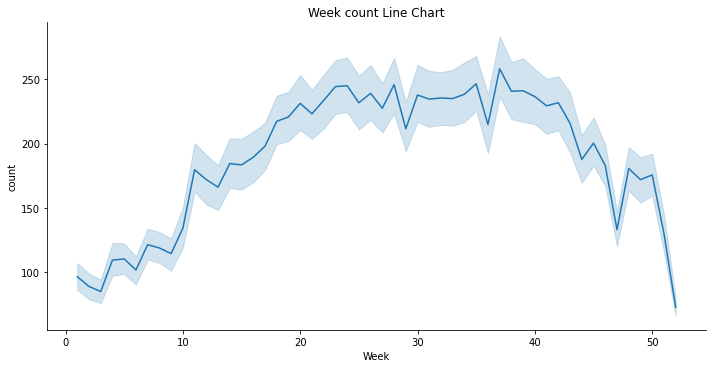

In [53]:
sns.relplot(x='Week',y='count',data=df, kind='line',aspect=2)
plt.title("Week count Line Chart")
plt.show()

- This could be a useful feature as line is fluctuating for every week. Also week have higher count durning summer

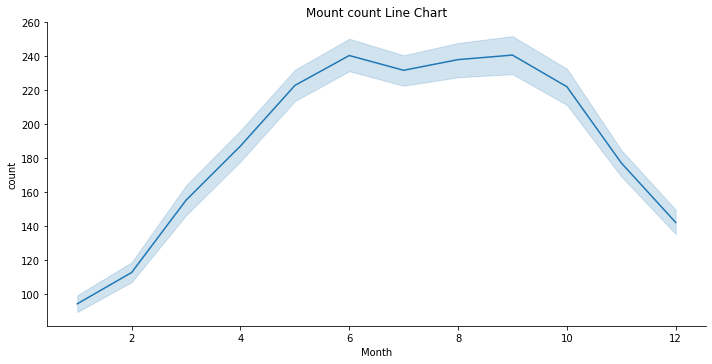

In [55]:
sns.relplot(x='Month',y='count',data=df, kind='line',aspect=2)
plt.title("Mount count Line Chart")
plt.show()

- It can be seen that count is high on month 6 through 9 due to summer and temperature compare to winter

In [34]:
df2=df.copy()

### Relationship between Hour and count

In [66]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

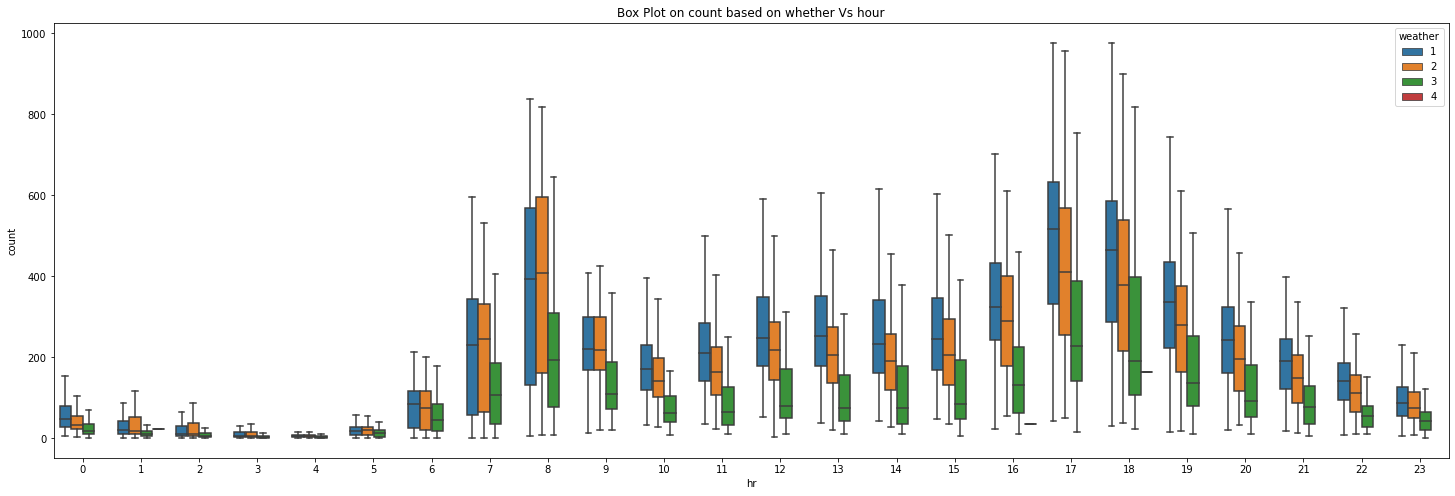

In [76]:
fig, ax = plt.subplots(figsize=(25, 8))
sns.boxplot(x="hr",y='count',data=df,showfliers=False, hue="weather")
plt.title("Box Plot on count based on whether Vs hour")
plt.show()

* higher count is on 18 & 19 th hour

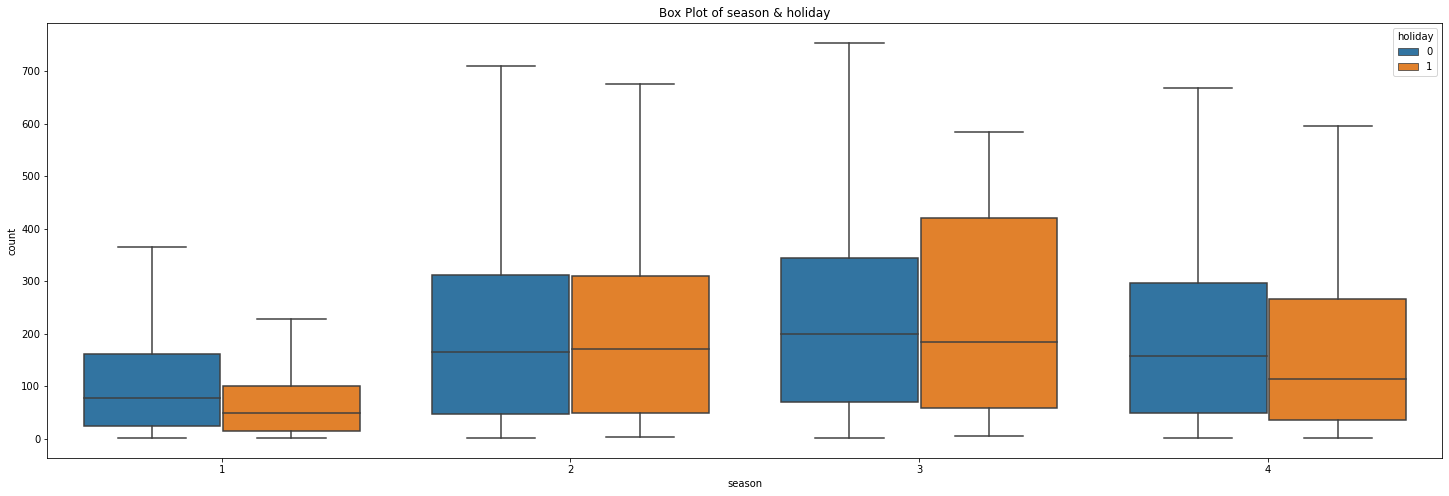

In [35]:
fig, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x='season', y='count', data=df, showfliers=False, hue="holiday")
plt.title("Box Plot of season & holiday")
plt.show()

-  It can be seen more bikes have been shared durning summer holidays compare to other season

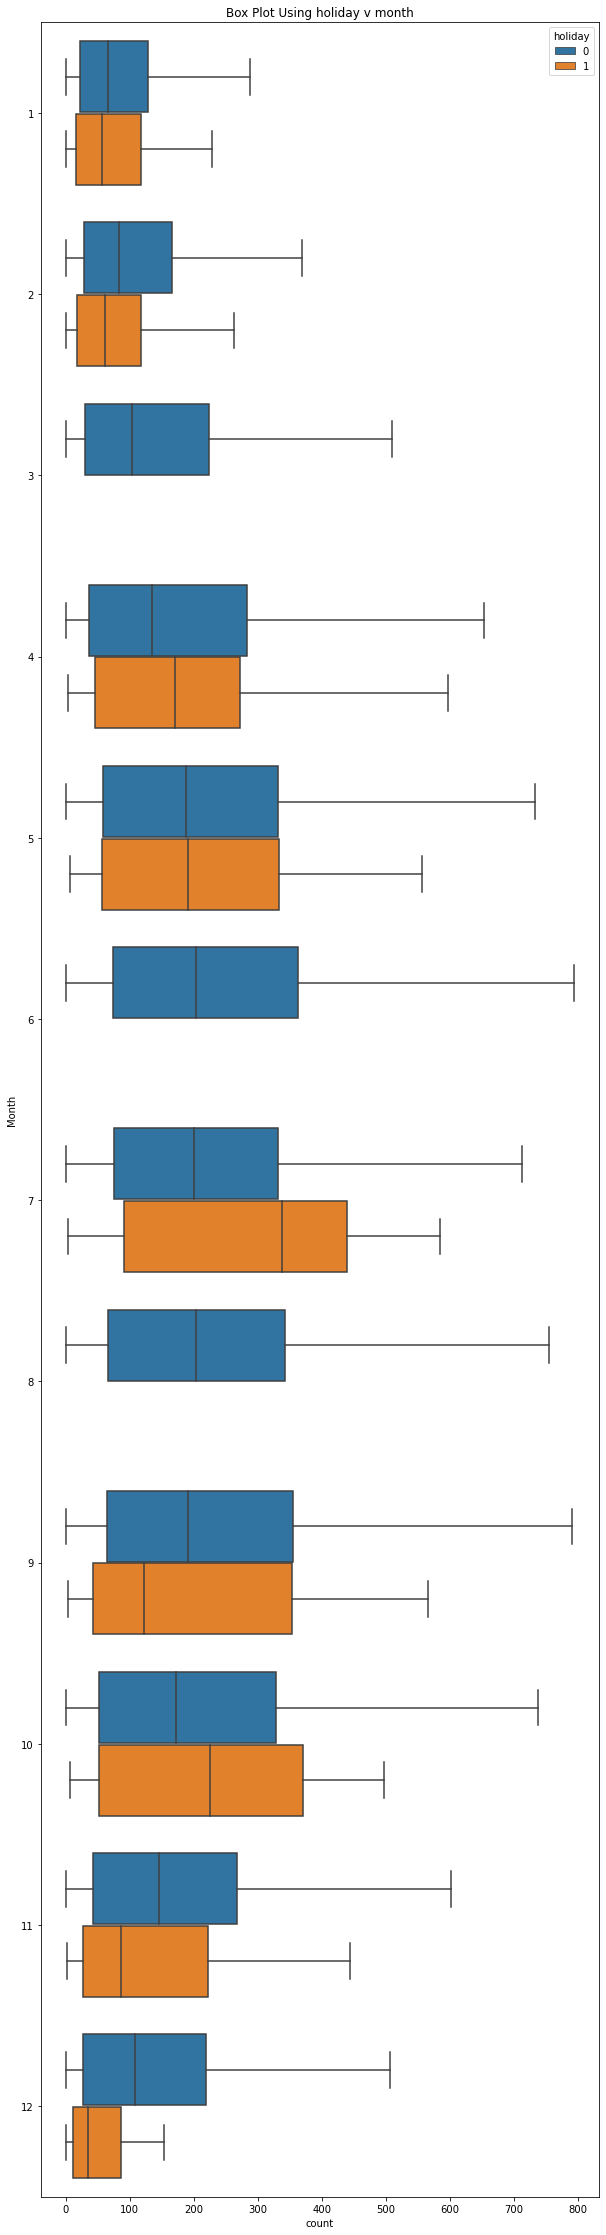

In [189]:
fig, ax = plt.subplots(figsize=(10, 40))
fig = sns.boxplot(y='Month', x='count', data=df, showfliers=False, hue="holiday",orient="h") 
plt.title("Box Plot Using holiday v month")
plt.show()

- month throught 7, 8, 9 has higher bike shared on weekends

### Average count - Per month

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

count_2011 = df[df.Year==2011].groupby('Month')['count'].mean().to_dict()
count2011_df = pd.DataFrame(list(count_2011.items()), columns=['Month', 'Avgcount2011'])

count_2012 = df[df.Year==2012].groupby('Month')['count'].mean().to_dict()
count2012_df = pd.DataFrame(list(count_2012.items()), columns=['Month', 'Avgcount2012'])


fig = make_subplots(rows=1, cols=3, subplot_titles=("Average count based on month 2011", "Average count based on month 2012"))

fig.add_trace(go.Bar(y=count2011_df.Avgcount2011, x=count2011_df.Month,),1, 1)

fig.add_trace(go.Bar(y=count2012_df.Avgcount2012, x=count2012_df.Month,),1, 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), template = 'plotly_dark', showlegend=False, height=500)

fig.update_xaxes(title_text="Month", row=1, col=1)
fig.update_xaxes(title_text="Month", row=1, col=2)


fig.update_yaxes(title_text="Average_count", row=1, col=1)
fig.update_yaxes(title_text="Average_count", row=1, col=2)

fig.update_yaxes(tick0=1, dtick=1)
fig.show()

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

In [36]:
reg_count = df.groupby('Month')['registered'].mean().to_dict()
regcount_df = pd.DataFrame(list(reg_count.items()), columns=['Month', 'count'])

unreg_count = df.groupby('Month')['casual'].mean().to_dict()
unregcount_df = pd.DataFrame(list(unreg_count.items()), columns=['Month', 'count'])

regcount_df1 =regcount_df
regcount_df1["regmark"] = 1
regcount_df1

unregcount_df =unregcount_df
unregcount_df["regmark"] = 0
unregcount_df

reg = pd.concat([regcount_df1,unregcount_df],axis=0)
reg.head()

fig = px.line(reg, x='Month', y='count', color='regmark', markers=True, title="Registered Vs Unregistered users count")
fig.show()

* registered users used the bike share more than the unregistered users

In [40]:
df["hr"] = df["hr"].astype("int")

# Analysis on daywise (feature engineering AM and PM)

In [41]:
df['AM'] = np.where(df.hr  < 12, 1, 0)
df['PM'] = np.where(df.hr  > 11, 1, 0)
df['AM'] = df['AM'].astype('bool')
df['PM'] = df['PM'].astype('bool')
df.head()

date season  hr holiday weekday workingday weather  temp   atemp  \
0 2011-01-01      1   0       0       6          0       1  0.24  0.2879   
1 2011-01-01      1   1       0       6          0       1  0.22  0.2727   
2 2011-01-01      1   2       0       6          0       1  0.22  0.2727   
3 2011-01-01      1   3       0       6          0       1  0.24  0.2879   
4 2011-01-01      1   4       0       6          0       1  0.24  0.2879   

   humidity  windspeed  casual  registered  count  Year  Month  Day  Week  \
0      0.81        0.0       3          13     16  2011      1    1    52   
1      0.80        0.0       8          32     40  2011      1    1    52   
2      0.80        0.0       5          27     32  2011      1    1    52   
3      0.75        0.0       3          10     13  2011      1    1    52   
4      0.75        0.0       0           1      1  2011      1    1    52   

     AM     PM  
0  True  False  
1  True  False  
2  True  False  
3  True  False  
4  True  False

In [42]:
df2=df.copy()

In [146]:
#This function is creating eta square test
def correlation_ratio(categories, measurements):
        fcat, _ = pd.factorize(categories)
        cat_num = np.max(fcat)+1
        y_avg_array = np.zeros(cat_num)
        n_array = np.zeros(cat_num)
        for i in range(0,cat_num):
            cat_measures = measurements[np.argwhere(fcat == i).flatten()]
            n_array[i] = len(cat_measures)
            y_avg_array[i] = np.average(cat_measures)
        y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
        numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
        denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
        if numerator == 0:
            eta = 0.0
        else:
            eta = numerator/denominator
        return eta

In [148]:
print("Correlation of AM feature with count")
print(correlation_ratio(df['AM'],df['count']))
print(50*'*')
print("Correlation of PM feature with count")
print(correlation_ratio(df['PM'],df['count']))
print(50*'*')

Correlation of AM feature with count
0.15593416744439786
**************************************************
Correlation of PM feature with count
0.15593416744439786
**************************************************


- Very less correlation between count and These two features

In [149]:
count_am = df['count'][df['AM']==1]
count_pm = df['count'][df['AM']==0]
print("Mean count of am: ", np.mean(count_am))
print("Standard devition of count of am: ", np.std(count_am))
print("Max count of am:: ", np.max(count_am))
print("Mean of count of pm: ", np.mean(count_pm))
print("Standard devition count of pm: ", np.std(count_pm))
print("Max count of pm: ", np.max(count_pm))
print("*"*100)


Mean count of am:  117.39555349698935
Standard devition of count of am:  149.71292151515453
Max count of am::  839
Mean of count of pm:  260.6486331922681
Standard devition count of pm:  181.82217048940558
Max count of pm:  977
****************************************************************************************************


- Looking at these data  it can be said that no. of people bike share in the evening is very high compare to morning

In [170]:
am_count = df.groupby('AM')['count'].mean().to_dict()
amcount_df = pd.DataFrame(list(am_count.items()), columns=['AM', 'count'])
amcount_df

fig = px.bar(amcount_df, x="AM", y="count",title="AM V PM count")
fig.show()

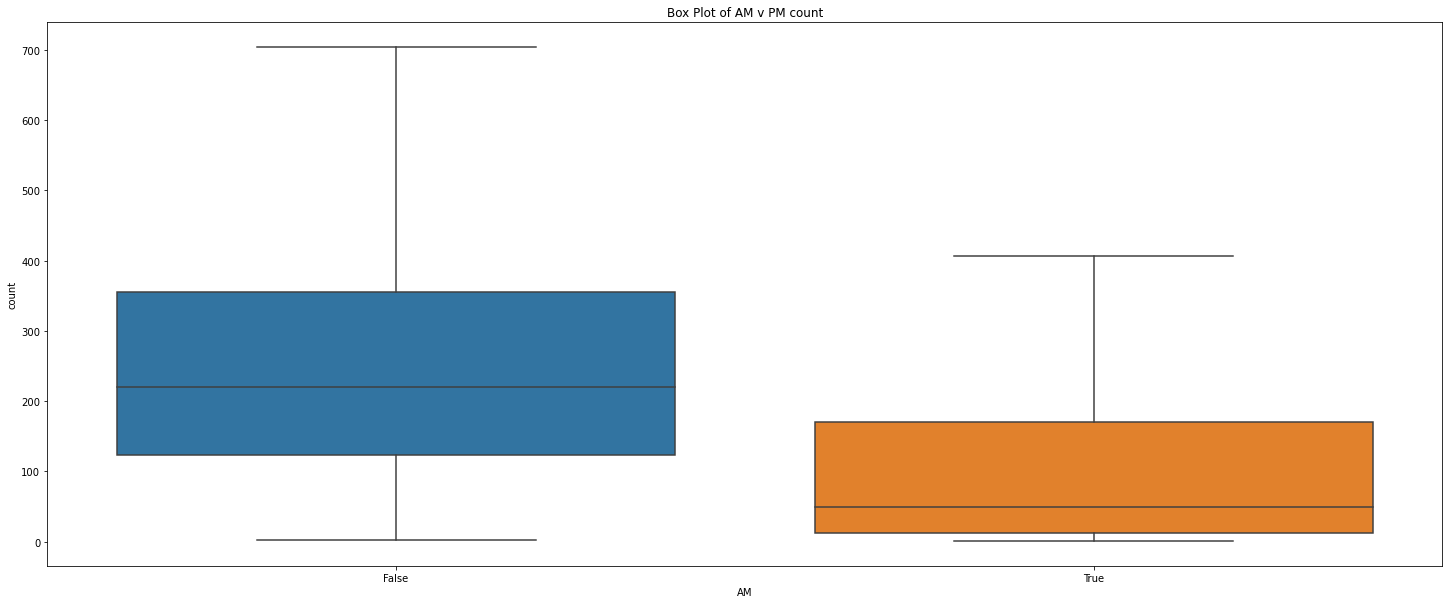

In [151]:
fig, ax = plt.subplots(figsize=(25, 10))
fig = sns.boxplot(x='AM', y='count', data=df, showfliers=False)
plt.title("Box Plot of AM v PM count")
plt.show()


In [43]:
df.head()

date season  hr holiday weekday workingday weather  temp   atemp  \
0 2011-01-01      1   0       0       6          0       1  0.24  0.2879   
1 2011-01-01      1   1       0       6          0       1  0.22  0.2727   
2 2011-01-01      1   2       0       6          0       1  0.22  0.2727   
3 2011-01-01      1   3       0       6          0       1  0.24  0.2879   
4 2011-01-01      1   4       0       6          0       1  0.24  0.2879   

   humidity  windspeed  casual  registered  count  Year  Month  Day  Week  \
0      0.81        0.0       3          13     16  2011      1    1    52   
1      0.80        0.0       8          32     40  2011      1    1    52   
2      0.80        0.0       5          27     32  2011      1    1    52   
3      0.75        0.0       3          10     13  2011      1    1    52   
4      0.75        0.0       0           1      1  2011      1    1    52   

     AM     PM  
0  True  False  
1  True  False  
2  True  False  
3  True  False  
4  True  False

In [48]:
df.corr()

hr      temp     atemp  humidity  windspeed    casual  \
hr          1.000000  0.137603  0.133750 -0.276498   0.137252  0.301202   
temp        0.137603  1.000000  0.987672 -0.069881  -0.023125  0.459616   
atemp       0.133750  0.987672  1.000000 -0.051918  -0.062336  0.454080   
humidity   -0.276498 -0.069881 -0.051918  1.000000  -0.290105 -0.347028   
windspeed   0.137252 -0.023125 -0.062336 -0.290105   1.000000  0.090287   
casual      0.301202  0.459616  0.454080 -0.347028   0.090287  1.000000   
registered  0.374141  0.335361  0.332559 -0.273933   0.082321  0.506618   
count       0.394071  0.404772  0.400929 -0.322911   0.093234  0.694564   
Year       -0.003867  0.040913  0.039222 -0.083546  -0.008740  0.142779   
Month      -0.005772  0.201691  0.208096  0.164411  -0.135386  0.068457   
Day         0.001538  0.027180  0.021269  0.025663   0.010505 -0.003283   
Week       -0.005437  0.198641  0.205561  0.174612  -0.131613  0.059667   
AM         -0.866093 -0.180046 -0.173870  0.353255  -0.168160 -0.379250   
PM          0.866093  0.180046  0.173870 -0.353255   0.168160  0.379250   

            registered     count      Year     Month       Day      Week  \
hr            0.374141  0.394071 -0.003867 -0.005772  0.001538 -0.005437   
temp          0.335361  0.404772  0.040913  0.201691  0.027180  0.198641   
atemp         0.332559  0.400929  0.039222  0.208096  0.021269  0.205561   
humidity     -0.273933 -0.322911 -0.083546  0.164411  0.025663  0.174612   
windspeed     0.082321  0.093234 -0.008740 -0.135386  0.010505 -0.131613   
casual        0.506618  0.694564  0.142779  0.068457 -0.003283  0.059667   
registered    1.000000  0.972151  0.253684  0.122273 -0.004098  0.116203   
count         0.972151  1.000000  0.250495  0.120638 -0.004312  0.113183   
Year          0.253684  0.250495  1.000000 -0.010473  0.002057 -0.010900   
Month         0.122273  0.120638 -0.010473  1.000000  0.007929  0.966538   
Day          -0.004098 -0.004312  0.002057  0.007929  1.000000  0.060038   
Week          0.116203  0.113183 -0.010900  0.966538  0.060038  1.000000   
AM           -0.349691 -0.394885  0.003427  0.005213 -0.001780  0.004849   
PM            0.349691  0.394885 -0.003427 -0.005213  0.001780 -0.004849   

                  AM        PM  
hr         -0.866093  0.866093  
temp       -0.180046  0.180046  
atemp      -0.173870  0.173870  
humidity    0.353255 -0.353255  
windspeed  -0.168160  0.168160  
casual     -0.379250  0.379250  
registered -0.349691  0.349691  
count      -0.394885  0.394885  
Year        0.003427 -0.003427  
Month       0.005213 -0.005213  
Day        -0.001780  0.001780  
Week        0.004849 -0.004849  
AM          1.000000 -1.000000  
PM         -1.000000  1.000000

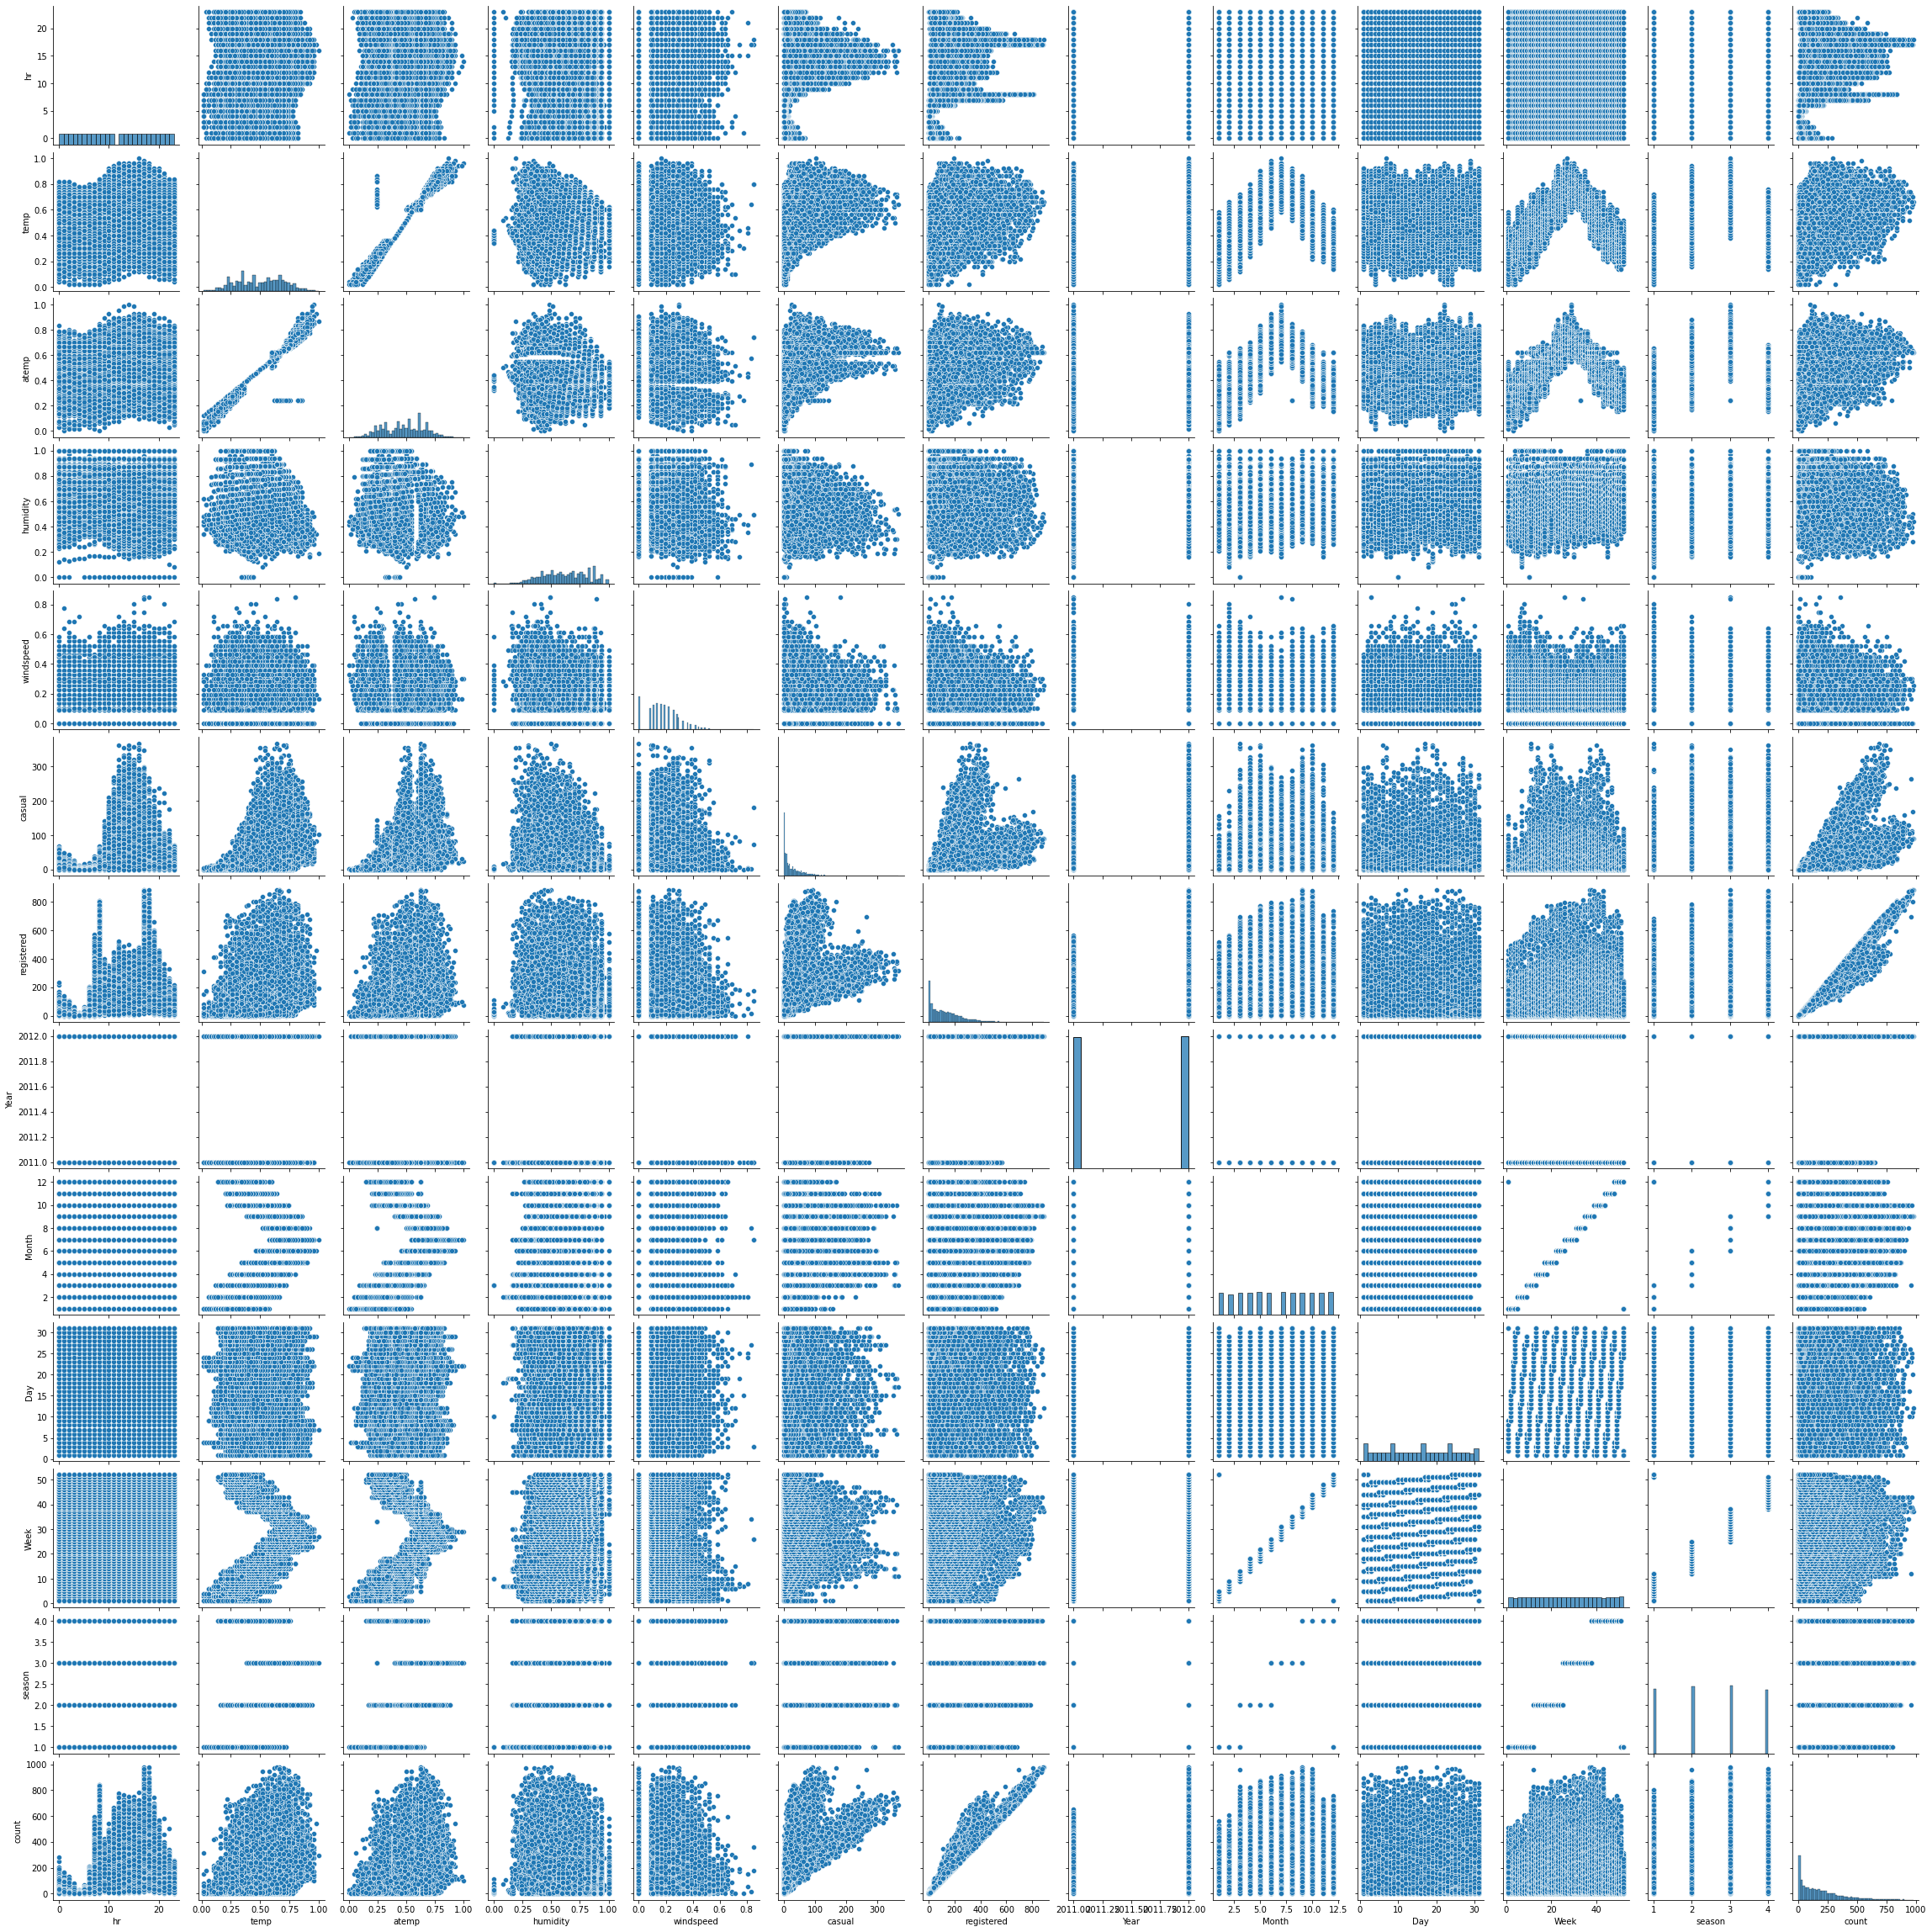

In [179]:
sns.pairplot(df1[[ 'hr', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'Year',
       'Month', 'Day', 'Week', 'season', 'count']])

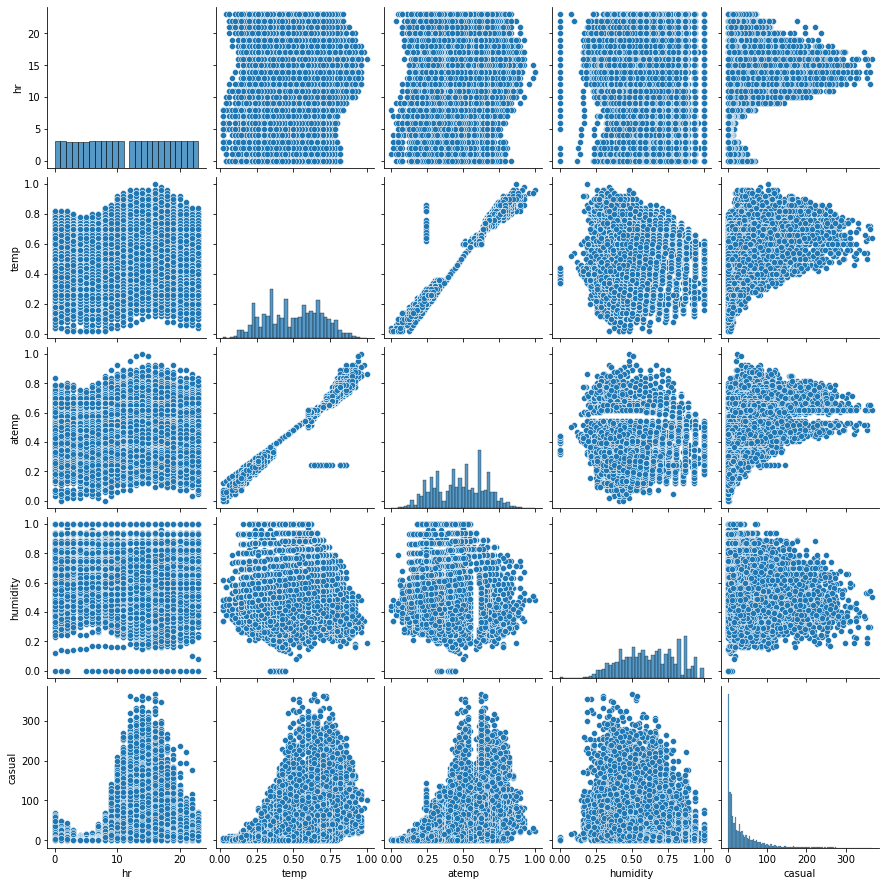

In [184]:
#sns.pairplot(train,vars=['Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])
sns.pairplot(df1,vars=['hr', 'temp', 'atemp','humidity','casual'])

<function matplotlib.pyplot.show(close=None, block=None)>

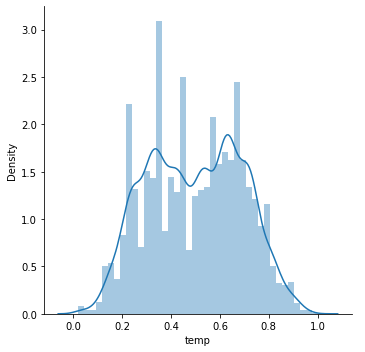

In [186]:
sns.FacetGrid(df,size = 5).map(sns.distplot,"temp").add_legend();
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

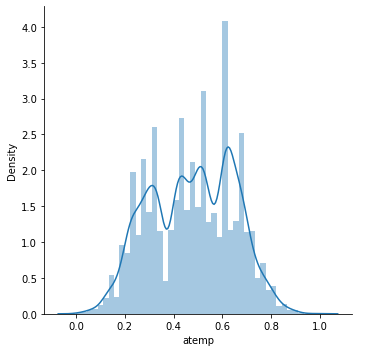

In [187]:
sns.FacetGrid(df,size = 5).map(sns.distplot,"atemp").add_legend();
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

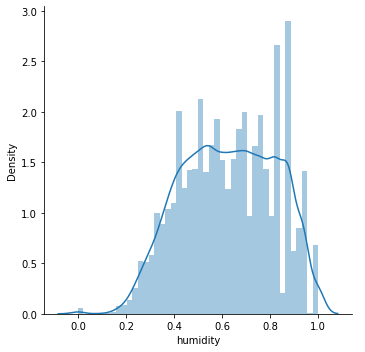

In [188]:
sns.FacetGrid(df,size=5).map(sns.distplot,"humidity").add_legend();
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

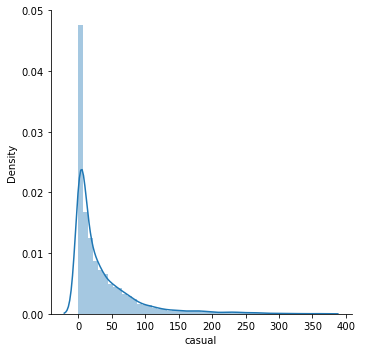

In [191]:
sns.FacetGrid(df,size=5).map(sns.distplot,"casual").add_legend();
plt.show

In [191]:
g = df.groupby(["Month","hr"])
monthly_averages = g.aggregate({"count":np.mean})
hr_high=monthly_averages.loc[monthly_averages.groupby('Month')['count'].idxmax()]
print("which have hr highest value during that Month: ")
hr_high.T

which have hr highest value during that Month: 


Month          1           2           3           4           5           6   \
hr             17          17          17          17          17          17   
count  220.580645  272.491228  392.290323  478.183333  549.322581  589.116667   

Month          7           8           9          10          11          12  
hr             17          17          17         17          17          17  
count  541.467742  591.532258  596.233333  571.52459  412.116667  316.516129

* it can be said that 17 AKA 18th hour or 6 PM has the highest bike shared in all months around the year

In [192]:
g = df.groupby(["Day","hr"])
Day_averages = g.aggregate({"count":np.mean})
Day_high=Day_averages.loc[Day_averages.groupby('Day')['count'].idxmax()]
print("which have hr highest value during day: ")
Day_high.T

which have hr highest value during day: 


Day        1           2        3        4           5           6      7   \
hr         17          17       17       17          17          17     17   
count  437.25  452.208333  475.625  458.625  481.833333  469.416667  453.0   

Day         8           9           10  ...          22          23       24  \
hr          17          17          17  ...          17          17       17   
count  381.375  474.041667  491.291667  ...  410.416667  415.583333  442.875   

Day            25      26          27      28          29          30  \
hr             17      17          17      17          17          17   
count  452.208333  452.75  470.333333  439.25  450.045455  448.727273   

Day            31  
hr             17  
count  472.857143  

[1 rows x 31 columns]

In [193]:
g = df.groupby(["weekday","Day"])
Day_averages = g.aggregate({"count":np.mean})
Day_high=Day_averages.loc[Day_averages.groupby('weekday')['count'].idxmax()]
print("which day in the week has the highest bike shared: ")
Day_high.T

which day in the week has the highest bike shared: 


weekday           0           1           2           3           4       5  \
Day              21          22          23          24          30      31   
count    222.854167  246.166667  278.354167  267.145833  275.583333  306.25   

weekday         6  
Day            20  
count    276.6875

* Bike shared is high towards the month end and saturday is shared more
* 

In [49]:
df3=df.copy()

## Creating dateset for training purpopse

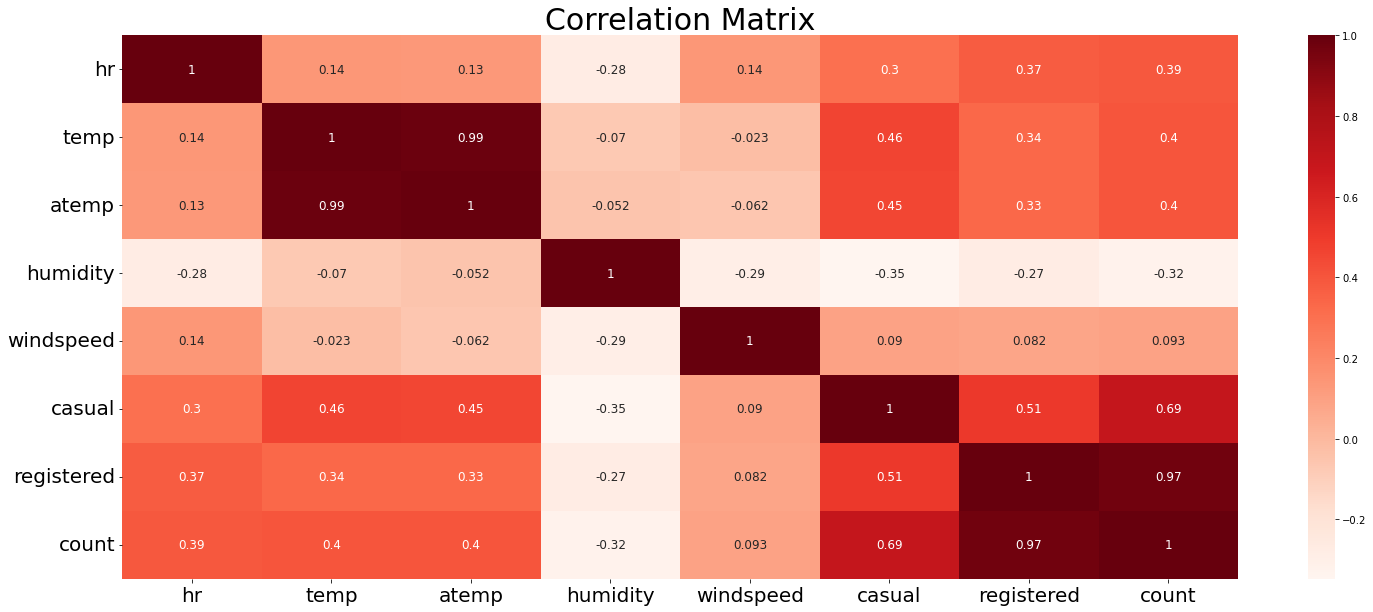

In [206]:
plt.figure(figsize=(25,10))
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)

sns.heatmap(df1[[ 'hr', 'holiday', 'workingday', 'weather', 'temp', 'atemp','humidity', 'windspeed', 'casual', 'registered', 'count']].corr(), cmap='Reds', annot=True, annot_kws={'size':12})
plt.title('Correlation Matrix', fontsize=30);


- temp, atemp,hr have moderate correlation with the count.
- humidity have moderate negetive correlation with the count.
- causal , registred have high correlation.